# Defect_Data_Preprocessing

* Written by: Angelo D. Bonzanini and Ketong Shao
* Date: June-July 2021

<< Code Desctription >>

## Imports

In [1]:
# General
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image as im

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load SEM and EDX data provided by Lam Research

1.   List item
2.   List item



In [2]:
execution_path = '/content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas'
targetDir = os.path.join(execution_path , "../Data/CNN_Data_LAM")
trainData = np.load(targetDir+'/train_data_6rot_3layer.npy', allow_pickle=True)
testData = np.load(targetDir+'/train_data_0rot_3layer.npy', allow_pickle=True)

### Plot the data to get intuition on the structure

Overall training data dimensions: (23880, 4)
-----------------------------------------------
xTrain[i, 0] shape: (140, 140)
xTrain[i, 1] shape: (1, 4096)
xTrain[i, 2] shape: (4096,)
xTrain[i, 3] shape: (8,)
-----------------------------------------------


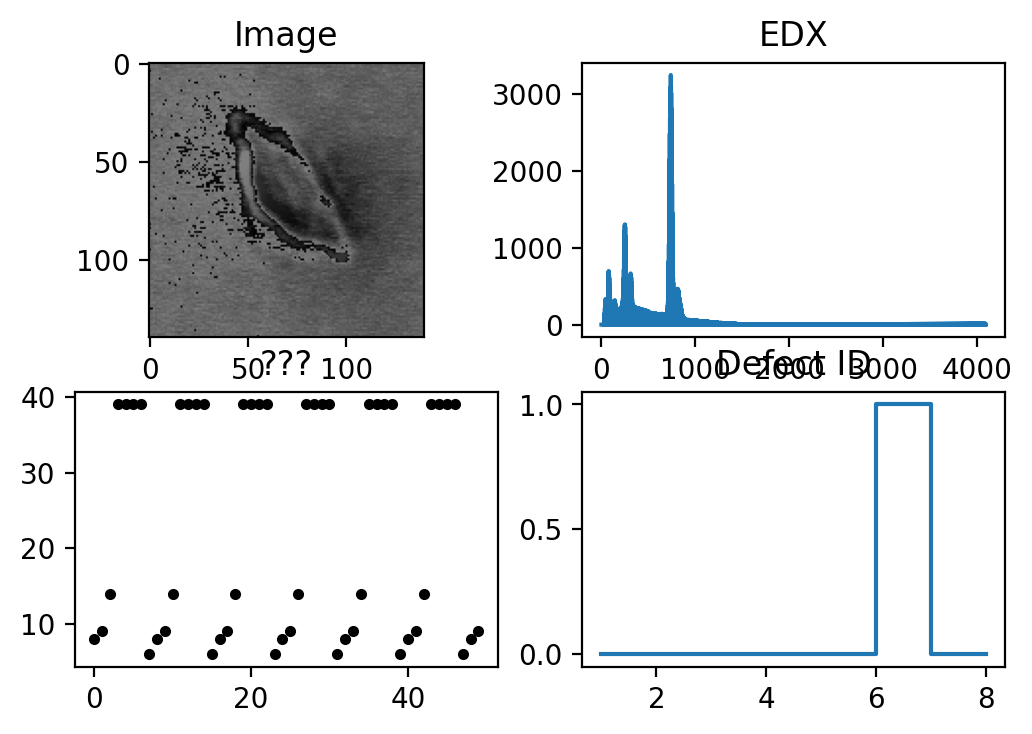

In [3]:
# Print dimensions of each array within the array
print('Overall training data dimensions:', trainData.shape)
print('-----------------------------------------------')
for j in range(0, 4):
    print('xTrain[i, %d] shape:' %j, trainData[0,j].shape)
print('-----------------------------------------------')

# Plot
plt.figure(dpi=200)
plt.subplot(221)
plt.imshow(trainData[0, 0], cmap='gray', vmin=-1, vmax=1)
plt.title('Image')
plt.subplot(222)
plt.plot(trainData[0, 1][0, :])
plt.title('EDX')
plt.subplot(223)
plt.plot(trainData[0, 2][0:50], 'k.')
plt.title('???')
plt.subplot(224)
plt.step(list(range(1, len(trainData[0,3])+1)), trainData[0, 3])
plt.title('Defect ID')
plt.show()

### Extract Training Images and Labels and re-scale for RGB (3-channel) conversion

In [4]:
trainImages = (trainData[0:-100,0]+1)*255/2
trainLabels = (trainData[0:-100,3])
trainLabels = np.concatenate(trainLabels).reshape(len(trainLabels), -1)

valImages = (trainData[-100:,0]+1)*255/2
valLabels = trainData[-100:,3]
valLabels = np.concatenate(valLabels).reshape(len(valLabels), -1)

testImages = (testData[:,0]+1)*255/2
testLabels = testData[:,3]
testLabels = np.concatenate(testLabels).reshape(len(testLabels), -1)

## Save data in .npy format

In [8]:
'''
imgSize = [140, 140]
xTrain = []
for i in range(0, len(trainImages)):
    print('iteration %d of %d' %(i, len(trainImages)))
    imgRGB  = im.fromarray(trainImages[i]).convert('RGB')
    xTrain += [np.array(imgRGB.getdata()).reshape(imgSize[0], imgSize[1], 3)]
np.save(execution_path + '/../Data/xTrain', xTrain)
np.save(execution_path + '/../Data/yTrain', trainLabels)

xVal = []
for i in range(0, len(valImages)):
    print('iteration %d of %d' %(i, len(valImages)))
    imgRGB  = im.fromarray(valImages[i]).convert('RGB')
    xVal += [np.array(imgRGB.getdata()).reshape(imgSize[0], imgSize[1], 3)]
np.save(execution_path + '/../Data/xVal', xVal)
np.save(execution_path + '/../Data/yVal', valLabels)
'''

xTest = []
for i in range(0, len(testImages)):
    print('iteration %d of %d' %(i, len(testImages)))
    imgRGB  = im.fromarray(testImages[i]).convert('RGB')
    xTest += [np.array(imgRGB.getdata()).reshape(imgSize[0], imgSize[1], 3)]
np.save(execution_path + '/../Data/xTest', xTest)
np.save(execution_path + '/../Data/yTest', testLabels)


iteration 0 of 3980
iteration 1 of 3980
iteration 2 of 3980
iteration 3 of 3980
iteration 4 of 3980
iteration 5 of 3980
iteration 6 of 3980
iteration 7 of 3980
iteration 8 of 3980
iteration 9 of 3980
iteration 10 of 3980
iteration 11 of 3980
iteration 12 of 3980
iteration 13 of 3980
iteration 14 of 3980
iteration 15 of 3980
iteration 16 of 3980
iteration 17 of 3980
iteration 18 of 3980
iteration 19 of 3980
iteration 20 of 3980
iteration 21 of 3980
iteration 22 of 3980
iteration 23 of 3980
iteration 24 of 3980
iteration 25 of 3980
iteration 26 of 3980
iteration 27 of 3980
iteration 28 of 3980
iteration 29 of 3980
iteration 30 of 3980
iteration 31 of 3980
iteration 32 of 3980
iteration 33 of 3980
iteration 34 of 3980
iteration 35 of 3980
iteration 36 of 3980
iteration 37 of 3980
iteration 38 of 3980
iteration 39 of 3980
iteration 40 of 3980
iteration 41 of 3980
iteration 42 of 3980
iteration 43 of 3980
iteration 44 of 3980
iteration 45 of 3980
iteration 46 of 3980
iteration 47 of 3980
it

In [ ]:
xTrain = np.load(execution_path+'/../Data/xTrain.npy')
yTrain = np.load(execution_path+'/../Data/yTrain.npy')
xVal = np.load(execution_path+'/../Data/xVal.npy')
yVal = np.load(execution_path+'/../Data/yVal.npy')